In [1]:
# Task3
# Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. 
# Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df3 = pd.read_csv("bank.csv")
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
print("Encode categorical columns")
label_encoder = LabelEncoder()
for col in df3.select_dtypes(include='object').columns:
    df3[col] = label_encoder.fit_transform(df3[col])

X = df3.drop('deposit', axis=1) 
y = df3['deposit']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy is :", accuracy_score(y_test, y_pred))
print("Classification Report is :\n", classification_report(y_test, y_pred))
print("Confusion Matrix is :\n", confusion_matrix(y_test, y_pred))

Encode categorical columns
Accuracy is : 0.782024484920872
Classification Report is :
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1742
           1       0.78      0.76      0.77      1607

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

Confusion Matrix is :
 [[1391  351]
 [ 379 1228]]


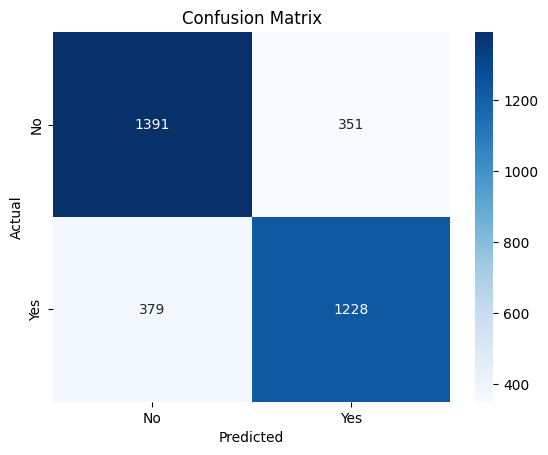

In [3]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

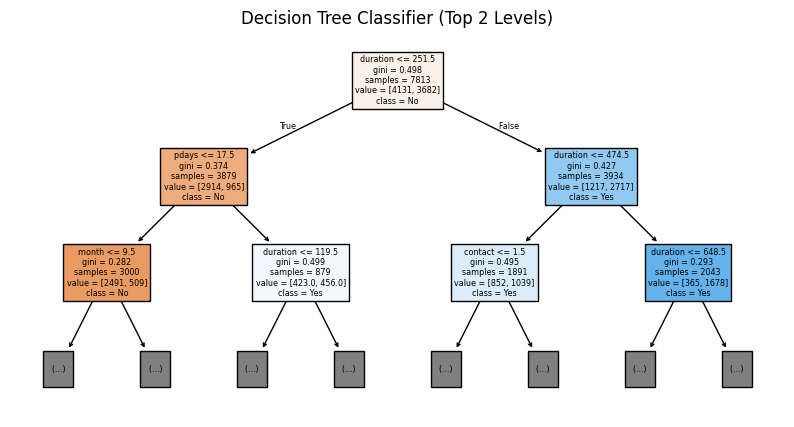

In [4]:
plt.figure(figsize=(10, 5))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True, max_depth=2)
plt.title("Decision Tree Classifier (Top 2 Levels)")
plt.show()